#Exercise : DNN - Boston data

#Conduct the DNN analysis using the boston dataset. You are required to improve the performance of the model using different archictecture. 


https://keras.io/api/datasets/boston_housing/








In [196]:
from keras.datasets import boston_housing


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical # To perform one-hot encoding (Build dummy columns with the easiest way)

from keras import initializers
from keras import regularizers

from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor 

# Load the dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [197]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [198]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [199]:
X_test

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [200]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [201]:
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (404, 13)
X_test.shape (102, 13)
y_train.shape (404,)
y_test.shape (102,)


In [202]:
# Option 1: Use initializers and regularizers

from keras import initializers
from keras import regularizers

# Option 2: Use Dropout with early stopping
from keras.layers import Dropout

# Option 3: Use EarlyStopping
from keras.callbacks import EarlyStopping

In [203]:
# Normalizing the data to help with the training

# X_train /= 255
# X_test /= 255

In [204]:
# Form NN
# Building a linear stack of layers with the sequential model

# Ways to run: 
# Orginal,
# Option 1,
# Original + Option 2,
# Original + Option 1 + Option 2,
# Original + Option 3
# Original + Option 2 + Option 3

L1=200
L2=100
L3=50

model = Sequential()
model.add(Dense(L1, input_dim=13,activation='relu')) # Original
# model.add(Dense(L1, input_dim=13,activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01))) # Option 1
model.add(Dense(L2, activation='relu'))
# model.add(Dropout(rate=0.2)) # Option 2
model.add(Dense(L3, activation='relu'))
# model.add(Dropout(rate=0.2)) # Option 2


# Output layer (Softmax = multi nominal)
model.add(Dense(1, activation='linear'))

In [205]:
# Compile the sequential model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [206]:
 # Training the model for 10 epochs

early_monitoring_monitor = EarlyStopping(patience=3) # Option 3

# history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))
history = model.fit(X_train,y_train,epochs=30,batch_size=100,validation_data=(X_test,y_test),callbacks=[early_monitoring_monitor]) # Option 3 with increased epochs

Epoch 1/30
5/5 [==============================] - 1s 50ms/step - loss: 240.2977 - mae: 12.1940 - val_loss: 222.1739 - val_mae: 12.6555
Epoch 2/30
5/5 [==============================] - 0s 17ms/step - loss: 144.3606 - mae: 9.4542 - val_loss: 82.9076 - val_mae: 7.6789
Epoch 3/30
5/5 [==============================] - 0s 15ms/step - loss: 89.8691 - mae: 6.8996 - val_loss: 87.8188 - val_mae: 6.7955
Epoch 4/30
5/5 [==============================] - 0s 12ms/step - loss: 77.6956 - mae: 6.6788 - val_loss: 96.1126 - val_mae: 7.9824
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 74.9202 - mae: 6.4454 - val_loss: 93.1180 - val_mae: 7.0698


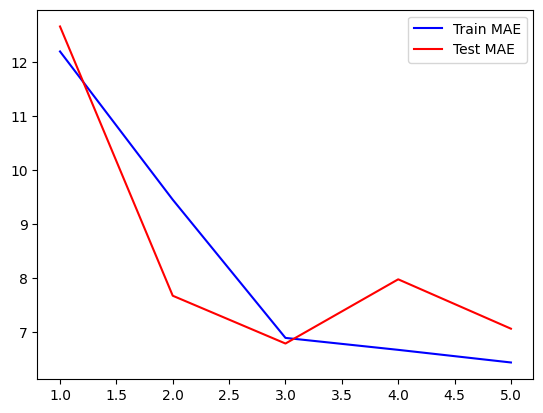

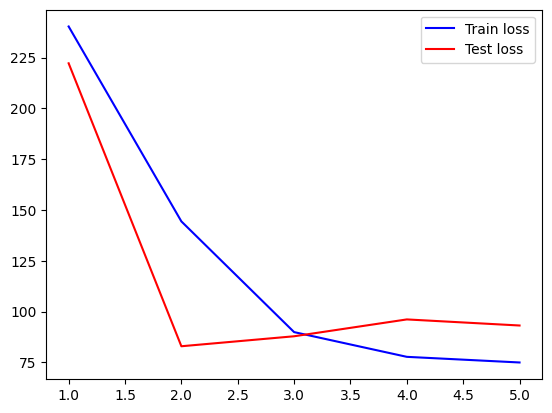

In [207]:
# Visualisations

import matplotlib.pyplot as plt

mae2 = history.history['mae']
# accuracy2 = history.history['accuracy']
val_mae = history.history['val_mae']
# val_accuracy = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(mae2)+1)
# epochs = range(1,len(accuracy2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, mae2, 'b', label='Train MAE')
# plt.plot(epochs, accuracy2, 'b', label='Train Accuracy')
plt.plot(epochs, val_mae, 'r', label='Test MAE')
# plt.plot(epochs, val_accuracy, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()

In [208]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
# No need to use to to_categorical for this dataset, as we are doing a linear data.

# Y_train = to_categorical(y_train)
# Y_test = to_categorical(y_test)
# print("Shape before one-hot encoding: ", y_train.shape)
# print("Shape after one-hot encoding: ", Y_train.shape)

In [210]:
# Function to create model, required for KerasClassifier (Categorial variables)


def create_model():
  # Create model
  model2 = Sequential()

  # Input layer
  model2.add(Dense(200,input_dim=13,activation='relu'))

  # Hidden layers
  model2.add(Dense(100,activation='relu'))
  model2.add(Dense(50,activation='relu'))
  model2.add(Dense(10,activation='linear'))
  
  # Output layer
  model2.add(Dense(1, activation= 'linear'))

  # Compile the model
  model2.compile(loss='mse',optimizer='adam',metrics=['mae'])

  

  return model2

In [212]:
# Create model (Time consuming)
# model2 = KerasClassifier(model=create_model,verbose=0) # Previously using classifier for categorical data
model2 = KerasRegressor(model=create_model,loss='mse',verbose=0) # Now use Regressor for linear data


# Define the grid search parameters

# Option 1: You may want to try Epochs and Batch Size.
batch_size = [100,200] # Option 1
epochs = [10,15,20] # Option 1

# You may want to try with activation functions.
# activation = ['elu', 'selu', 'relu', 'softmax', 'tanh'] # Option 2

# Option 3: You may want to try with the optimizers.
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam','Adamax', 'Nadam'] # Option 3


param_grid= dict(batch_size=batch_size,epochs=epochs)  # Option 1

# param_grid= dict(model__activation = activation)  # Option 2

# param_grid = dict(optimizer=optimizer) # Option 3

# n_jobs = CPU processing. if -1 means it will use all CPUs.
# cv=cross validation, times of cross validations
grid = GridSearchCV(estimator=model2,param_grid=param_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(X_train,y_train)

In [213]:
# Summarize the results

print('Best %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with %r' % (mean, stdev, param))

Best 0.272049 using {'batch_size': 200, 'epochs': 20}
0.241691 (0.073382) with {'batch_size': 100, 'epochs': 10}
0.176316 (0.267620) with {'batch_size': 100, 'epochs': 15}
0.239755 (0.051172) with {'batch_size': 100, 'epochs': 20}
-1.046564 (1.609580) with {'batch_size': 200, 'epochs': 10}
0.165044 (0.087528) with {'batch_size': 200, 'epochs': 15}
0.272049 (0.053678) with {'batch_size': 200, 'epochs': 20}
